# Millie White
# Personal Project 
# Conditions Contributing to Deaths Involving Coronavirus Disease 2019 (COVID-19), by Age Group and State, United States

In [1]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt

# increase the size and quality of any plots we produce
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 300

In [2]:
import pandas as pd
import numpy as np

In [3]:
#open the csv file as a pandas dataframe
my_df = pd.read_csv ('Conditions_contributing_to_COVID-19___by_age_group_and_state__United_States.csv')
my_df.tail(5)
my_df.size #the number of rows

3303720

In [4]:
my_df.head(5)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,04/25/2021,01/01/2020,04/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,370.0,384.0,NaN
1,04/25/2021,01/01/2020,04/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1692.0,1731.0,NaN
2,04/25/2021,01/01/2020,04/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,4548.0,4664.0,NaN
3,04/25/2021,01/01/2020,04/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,13587.0,13964.0,NaN
4,04/25/2021,01/01/2020,04/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,34936.0,35852.0,NaN


In [5]:
#make copy of dataframe
df = my_df.copy()
df.head(1)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,04/25/2021,01/01/2020,04/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,370.0,384.0,NaN


In [6]:
#columns in dataframe
df.columns

Index(['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group',
       'COVID-19 Deaths', 'Number of Mentions', 'Flag'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace(' ','_')#remove spaces
df.columns = df.columns.str.replace('-','')#remove hyphens
df.columns

Index(['Data_As_Of', 'Start_Date', 'End_Date', 'Group', 'Year', 'Month',
       'State', 'Condition_Group', 'Condition', 'ICD10_codes', 'Age_Group',
       'COVID19_Deaths', 'Number_of_Mentions', 'Flag'],
      dtype='object')

# Condition Groups

In [8]:
#different condition groups
#All values in the condition group
df['Condition_Group'].unique()

array(['Respiratory diseases', 'Circulatory diseases', 'Sepsis',
       'Malignant neoplasms', 'Diabetes', 'Obesity', 'Alzheimer disease',
       'Vascular and unspecified dementia', 'Renal failure',
       'Intentional and unintentional injury, poisoning, and other adverse events',
       'All other conditions and causes (residual)', 'COVID-19'],
      dtype=object)

In [9]:
#The number of condition groups
df['Condition_Group'].unique().size

12

In [10]:
#Condition groups in a list
conditions = df['Condition_Group'].unique().tolist()
conditions

['Respiratory diseases',
 'Circulatory diseases',
 'Sepsis',
 'Malignant neoplasms',
 'Diabetes',
 'Obesity',
 'Alzheimer disease',
 'Vascular and unspecified dementia',
 'Renal failure',
 'Intentional and unintentional injury, poisoning, and other adverse events',
 'All other conditions and causes (residual)',
 'COVID-19']

In [11]:
#shorten names in condition group list for more compact labeling of visualizations

In [12]:
#Number of COVID-19 Deaths by Condition Group
df.groupby('Condition_Group')['COVID19_Deaths'].sum()

Condition_Group
All other conditions and causes (residual)                                   2539428.0
Alzheimer disease                                                             238424.0
COVID-19                                                                     6666767.0
Circulatory diseases                                                         4555687.0
Diabetes                                                                     1059883.0
Intentional and unintentional injury, poisoning, and other adverse events     124121.0
Malignant neoplasms                                                           305611.0
Obesity                                                                       252395.0
Renal failure                                                                 654974.0
Respiratory diseases                                                         7224449.0
Sepsis                                                                        629049.0
Vascular and unspecified de

# Percentage of COVID-19 Deaths by Condition Group - Bar Chart

In [13]:
#Table of Death per Age Groups
condition_deaths = df.groupby('Condition_Group')['COVID19_Deaths'].sum().reset_index()
condition_deaths

,Condition_Group,COVID19_Deaths
0,All other conditions and causes (residual),2539428.0
1,Alzheimer disease,238424.0
2,COVID-19,6666767.0
3,Circulatory diseases,4555687.0
4,Diabetes,1059883.0
5,"Intentional and unintentional injury, poisonin...",124121.0
6,Malignant neoplasms,305611.0
7,Obesity,252395.0
8,Renal failure,654974.0
9,Respiratory diseases,7224449.0


Text(0.5, 1.0, 'COVID-19 Deaths vs Condition_Group')

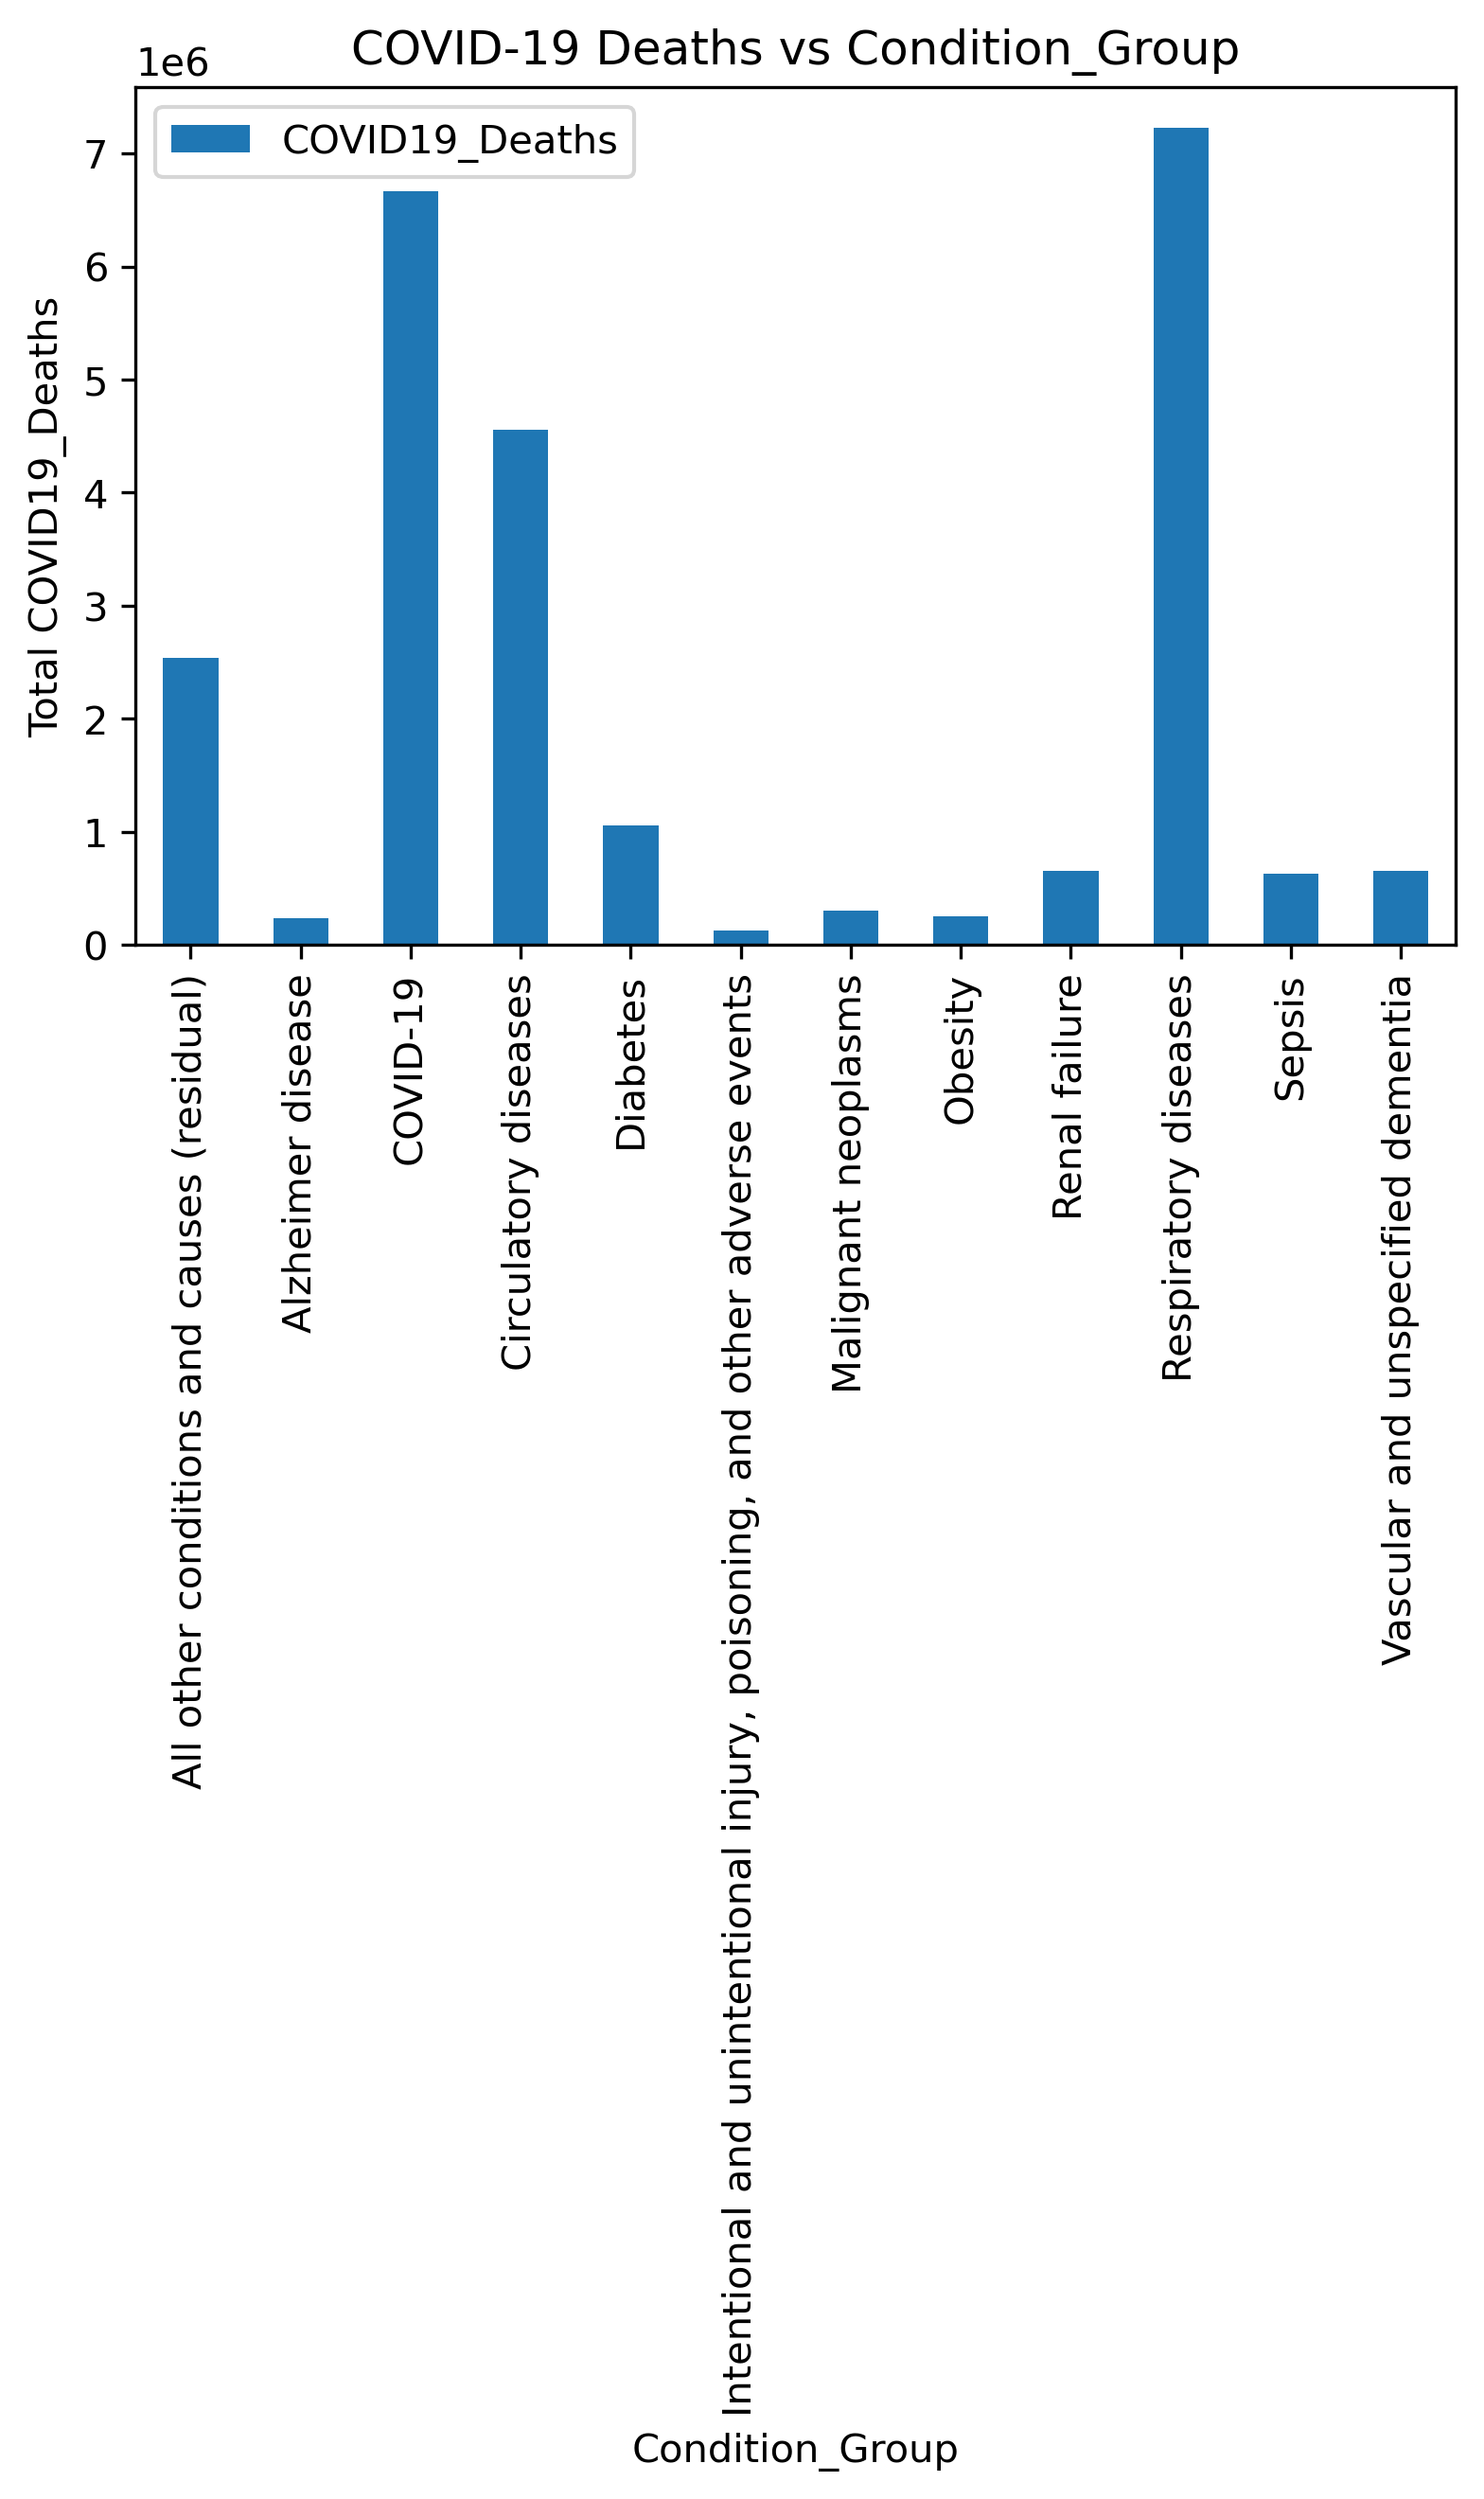

In [14]:
#Bar Chart of COVID-19 Deaths by Condition Group
condition_deaths.plot.bar(x = 'Condition_Group',y = 'COVID19_Deaths')
plt.xlabel("Condition_Group")
plt.ylabel("Total COVID19_Deaths")
plt.title('COVID-19 Deaths vs Condition_Group')

# Percentage of COVID-19 Deaths by Condition Group - Pie Chart 

Text(0.5, 1.0, 'Respiratory diseases leading COVID-19 Deaths ')

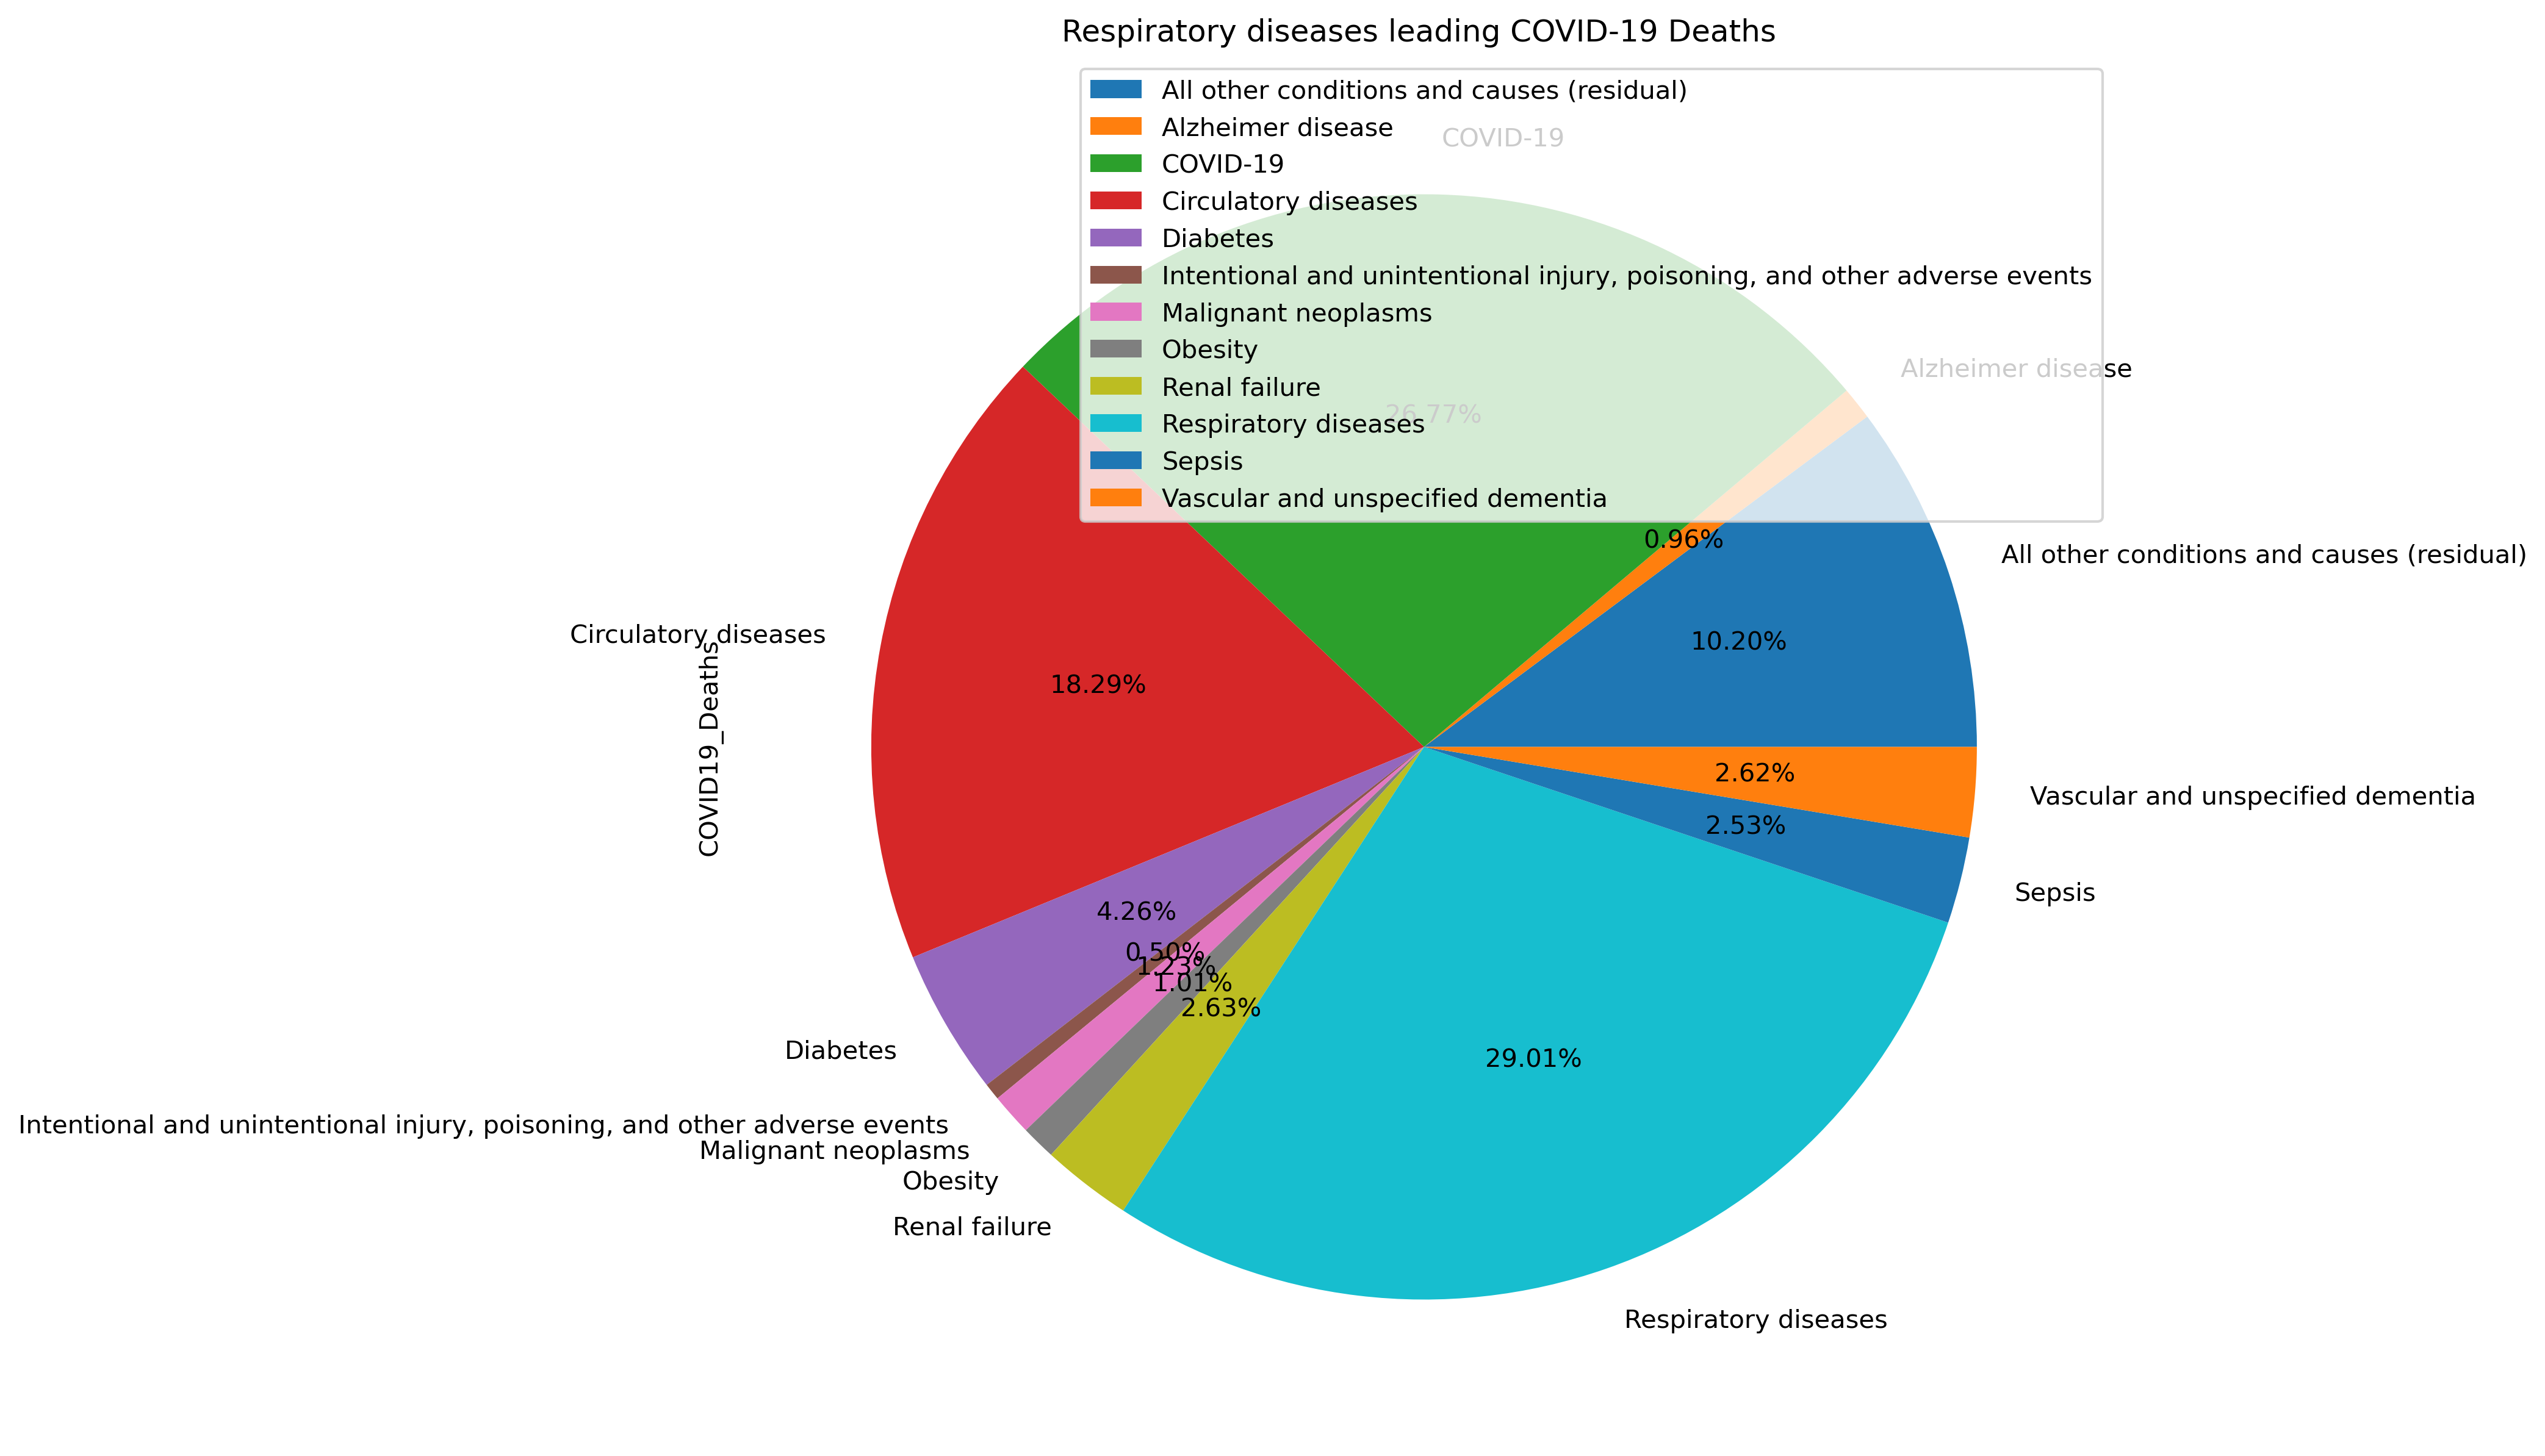

In [16]:
#Pie Chart showing percentage of COVID-19 Deaths by Age Group
condition_deaths.plot.pie(y = 'COVID19_Deaths',labels = condition_deaths.Condition_Group, autopct="%1.2f%%" ,figsize=(10, 10))
plt.title("Respiratory diseases leading COVID-19 Deaths ") 

# Removing COVID-19 as a condition of death to get a more accurate view of other factors contributing to deaths involving COVID-19

In [17]:
condition_deaths

,Condition_Group,COVID19_Deaths
0,All other conditions and causes (residual),2539428.0
1,Alzheimer disease,238424.0
2,COVID-19,6666767.0
3,Circulatory diseases,4555687.0
4,Diabetes,1059883.0
5,"Intentional and unintentional injury, poisonin...",124121.0
6,Malignant neoplasms,305611.0
7,Obesity,252395.0
8,Renal failure,654974.0
9,Respiratory diseases,7224449.0


In [18]:
#indexes with COVID-19 in the Condition_Group
covid = df[df['Condition_Group'] == 'COVID-19'].index
covid

Int64Index([   220,    221,    222,    223,    224,    225,    226,    227,
               228,    229,
            ...
            235970, 235971, 235972, 235973, 235974, 235975, 235976, 235977,
            235978, 235979],
           dtype='int64', length=10260)

In [19]:
#drop the indexes with COVID-19 in the Condition_Group
df.drop(covid , inplace=True)

In [20]:
condition_deaths

,Condition_Group,COVID19_Deaths
0,All other conditions and causes (residual),2539428.0
1,Alzheimer disease,238424.0
2,COVID-19,6666767.0
3,Circulatory diseases,4555687.0
4,Diabetes,1059883.0
5,"Intentional and unintentional injury, poisonin...",124121.0
6,Malignant neoplasms,305611.0
7,Obesity,252395.0
8,Renal failure,654974.0
9,Respiratory diseases,7224449.0


In [21]:
#make sure the indexes are removed
df['Condition_Group'].unique().tolist()

['Respiratory diseases',
 'Circulatory diseases',
 'Sepsis',
 'Malignant neoplasms',
 'Diabetes',
 'Obesity',
 'Alzheimer disease',
 'Vascular and unspecified dementia',
 'Renal failure',
 'Intentional and unintentional injury, poisoning, and other adverse events',
 'All other conditions and causes (residual)']

# Bar Chart

In [22]:
NoCOVIDcondition_deaths = df.groupby('Condition_Group')['COVID19_Deaths'].sum().reset_index()
NoCOVIDcondition_deaths

,Condition_Group,COVID19_Deaths
0,All other conditions and causes (residual),2539428.0
1,Alzheimer disease,238424.0
2,Circulatory diseases,4555687.0
3,Diabetes,1059883.0
4,"Intentional and unintentional injury, poisonin...",124121.0
5,Malignant neoplasms,305611.0
6,Obesity,252395.0
7,Renal failure,654974.0
8,Respiratory diseases,7224449.0
9,Sepsis,629049.0


In [23]:
#Sort table by the number of covid deaths descending
NoCOVIDcondition_deaths.sort_values(['COVID19_Deaths'],ascending = False)

,Condition_Group,COVID19_Deaths
8,Respiratory diseases,7224449.0
2,Circulatory diseases,4555687.0
0,All other conditions and causes (residual),2539428.0
3,Diabetes,1059883.0
7,Renal failure,654974.0
10,Vascular and unspecified dementia,653419.0
9,Sepsis,629049.0
5,Malignant neoplasms,305611.0
6,Obesity,252395.0
1,Alzheimer disease,238424.0


# Respiratory diseases contribute to most deaths involving COVID-19,followed by circulatory diseases.Intentional and unintentional injury, poisoning, and other adverse events contribute the least to deaths involving COVID-19

Text(0.5, 1.0, 'COVID-19 Deaths vs Condition_Group')

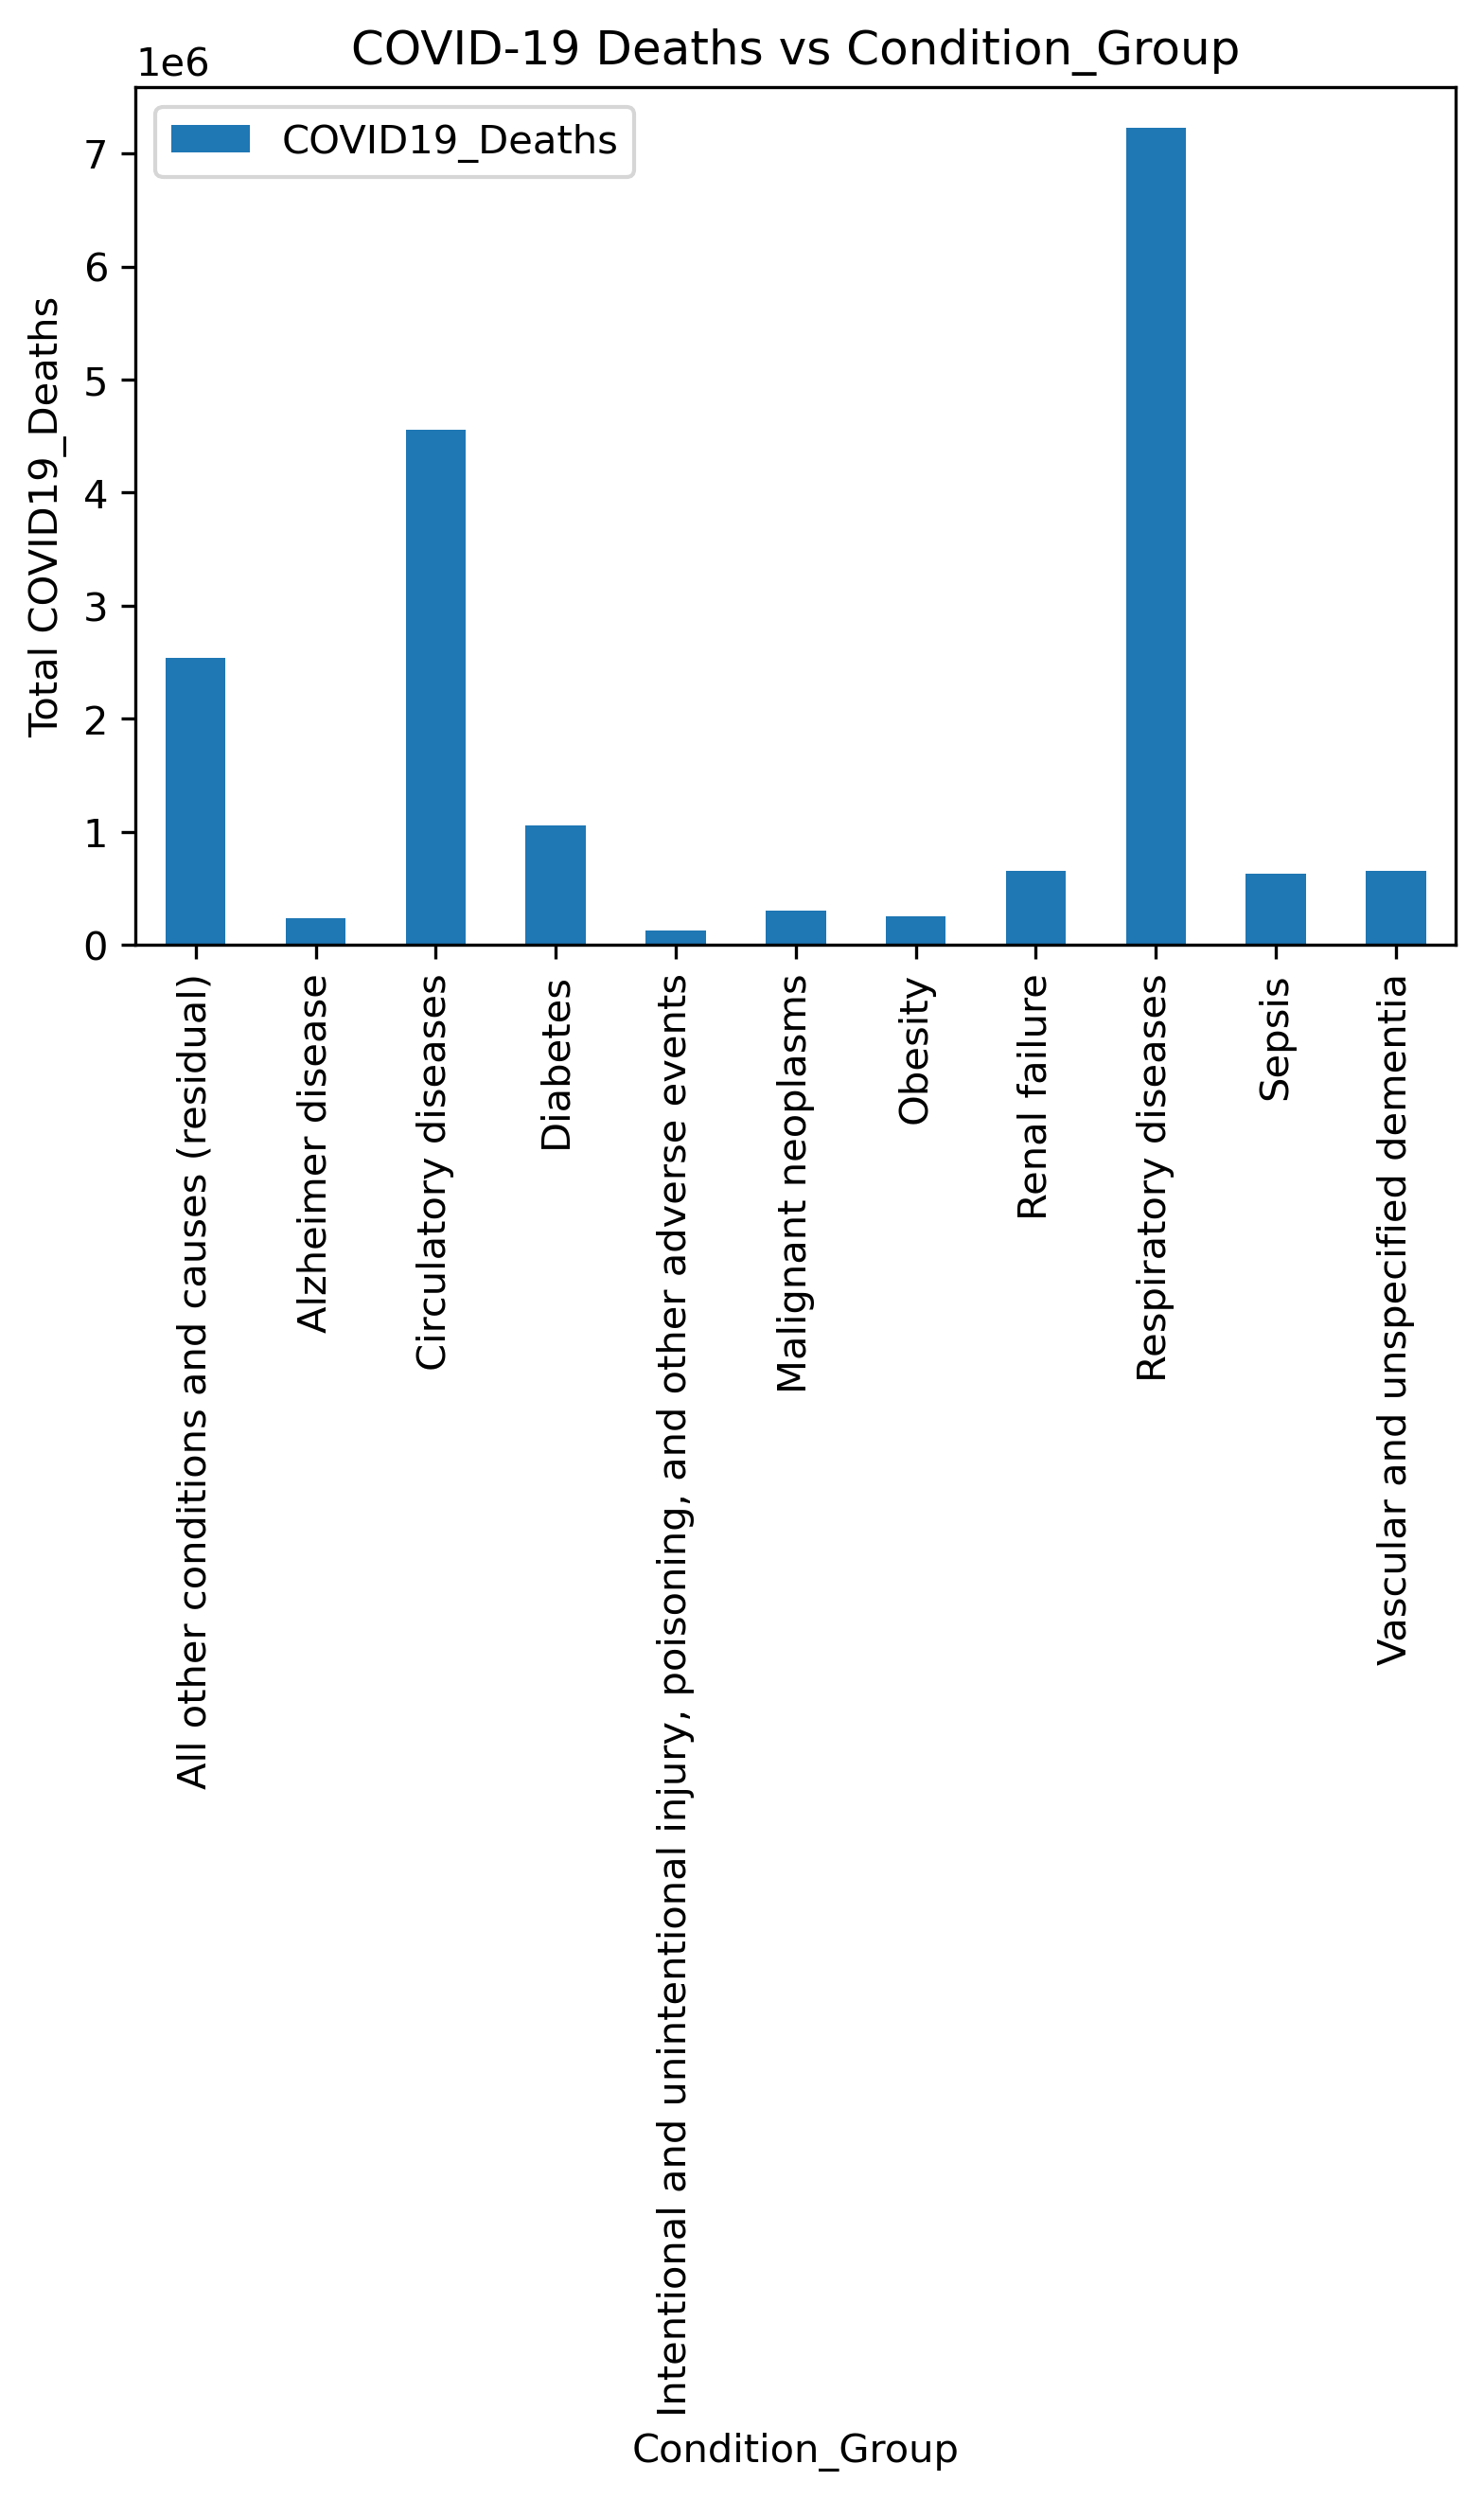

In [24]:
#Bar Chart of COVID-19 Deaths by Condition Group
NoCOVIDcondition_deaths.plot.bar(x = 'Condition_Group',y = 'COVID19_Deaths')
plt.xlabel("Condition_Group")
plt.ylabel("Total COVID19_Deaths")
plt.title('COVID-19 Deaths vs Condition_Group')

# Pie Chart

Text(0.5, 1.0, 'Respiratory diseases leading COVID-19 Deaths ')

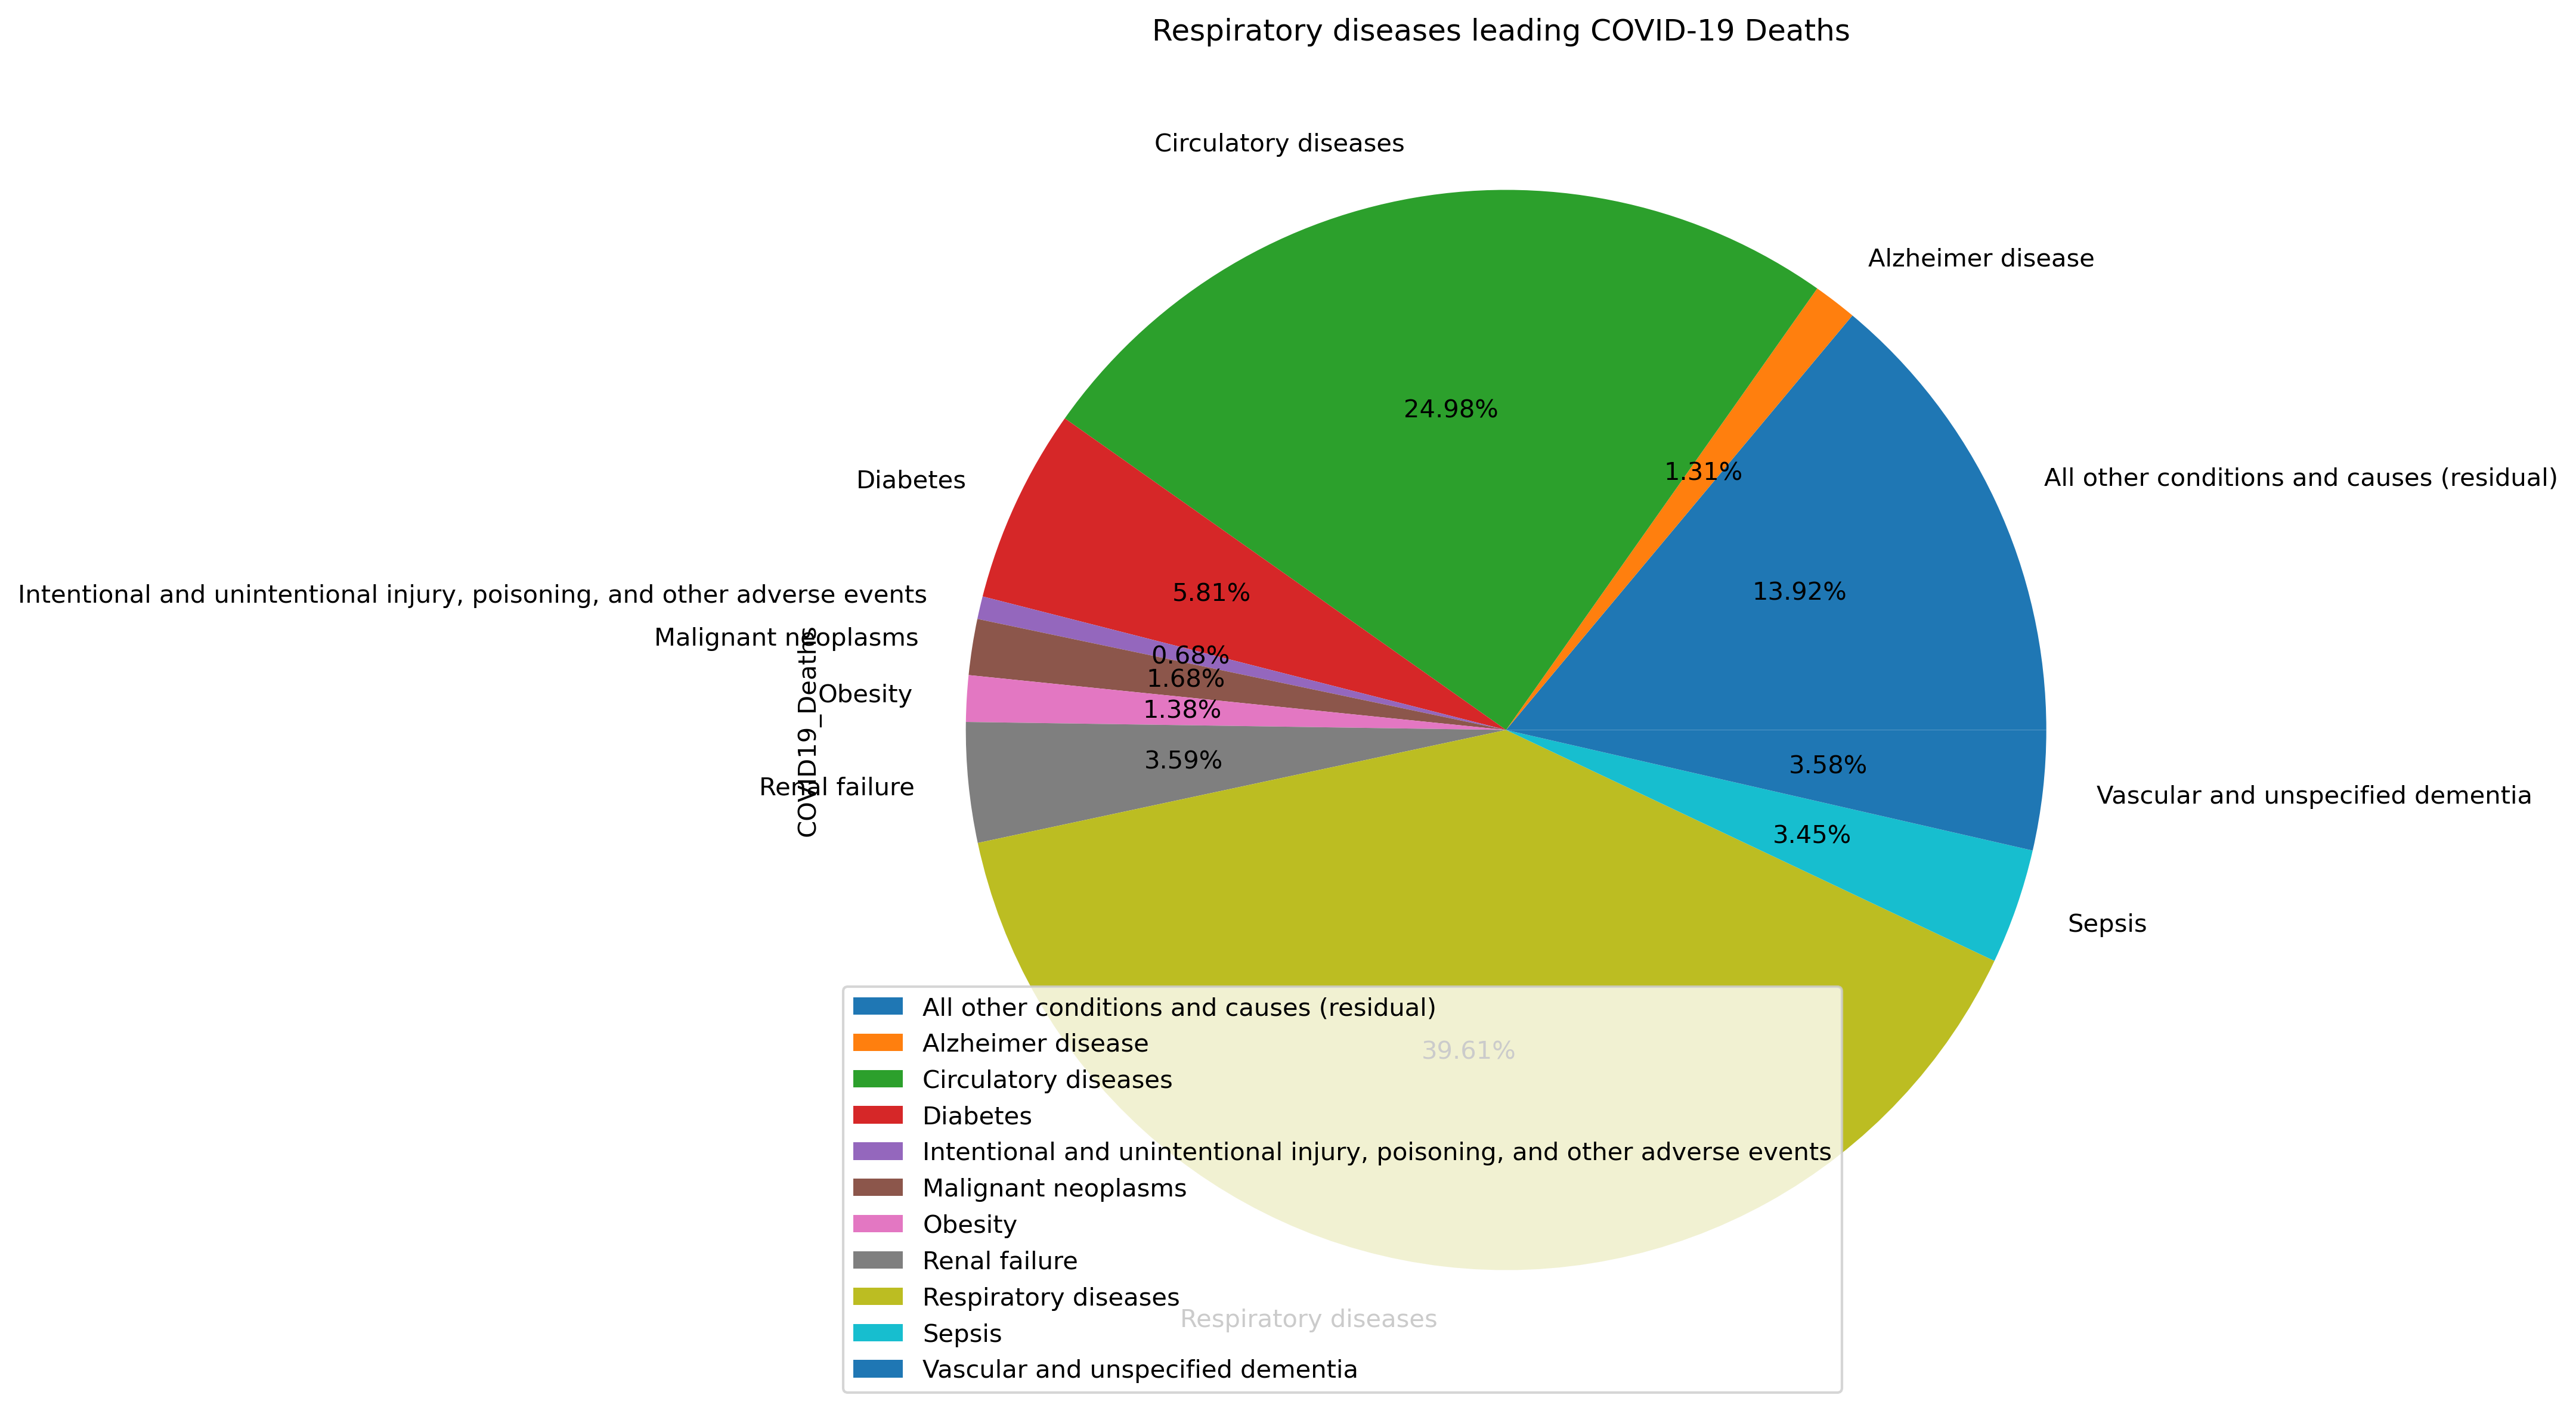

In [25]:
NoCOVIDcondition_deaths.plot.pie(y = 'COVID19_Deaths',labels = NoCOVIDcondition_deaths.Condition_Group, autopct="%1.2f%%" ,figsize=(10, 10))
plt.title("Respiratory diseases leading COVID-19 Deaths ") 

# Age groups

In [26]:
#all the age groups
df['Age_Group'].unique().tolist()#data[data['Value'] == True]

['0-24',
 '25-34',
 '35-44',
 '45-54',
 '55-64',
 '65-74',
 '75-84',
 '85+',
 'Not stated',
 'All Ages']

# I want to remove all rows with 'Not stated' and 'All Ages'in the Age Group column before visualizing the data

In [27]:
df[df['Age_Group'] == 'Not stated'].index

Int64Index([     8,     18,     28,     38,     48,     58,     68,     78,
                88,     98,
            ...
            235794, 235795, 235796, 235797, 235798, 235799, 235800, 235801,
            235802, 235803],
           dtype='int64', length=22572)

In [28]:
df[df['Age_Group'] == 'All Ages'].index

Int64Index([     9,     19,     29,     39,     49,     59,     69,     79,
                89,     99,
            ...
            235810, 235811, 235812, 235813, 235814, 235815, 235816, 235817,
            235818, 235819],
           dtype='int64', length=22572)

In [29]:
# Get indexes where Age Group column has value 'Not stated' or 'All Ages'
indexNames = df[(df['Age_Group'] == 'Not stated') | (df['Age_Group'] == 'All Ages')].index
print(indexNames)

# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.size

Int64Index([     8,      9,     18,     19,     28,     29,     38,     39,
                48,     49,
            ...
            235810, 235811, 235812, 235813, 235814, 235815, 235816, 235817,
            235818, 235819],
           dtype='int64', length=45144)


2528064

In [30]:
#make sure the indexes are removed
df['Age_Group'].unique().tolist()

['0-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']

In [31]:
#Death per Age Groups
age_group_deaths = df.groupby('Age_Group')['COVID19_Deaths'].sum().reset_index()
age_group_deaths

,Age_Group,COVID19_Deaths
0,0-24,9695.0
1,25-34,45281.0
2,35-44,133936.0
3,45-54,422475.0
4,55-64,1139929.0
5,65-74,2109344.0
6,75-84,2578187.0
7,85+,2602431.0


In [32]:
df['Age_Group'].unique().tolist()

['0-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']

Text(0.5, 1.0, 'COVID-19 Deaths Increase With Increasing Age')

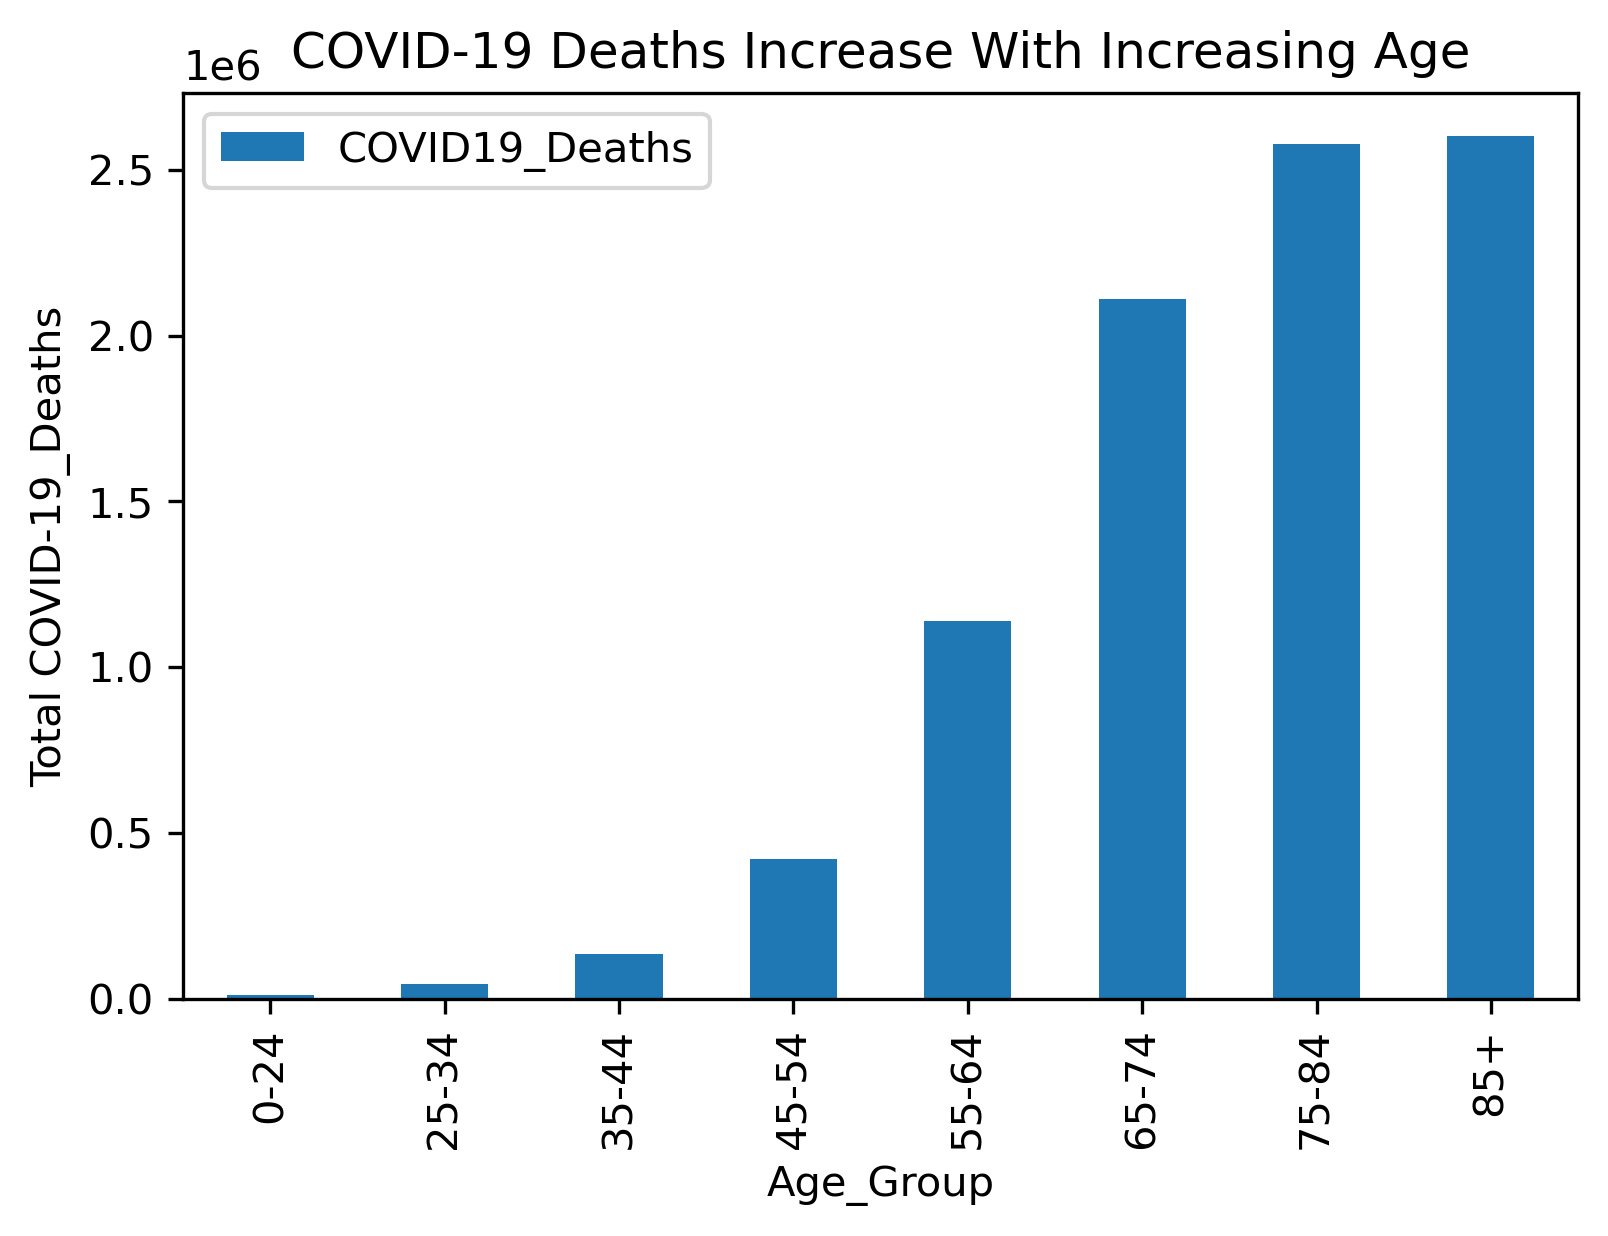

In [33]:
age_group_deaths.plot.bar(x = 'Age_Group',y = 'COVID19_Deaths')
plt.xlabel("Age_Group")
plt.ylabel("Total COVID-19_Deaths")
plt.title('COVID-19 Deaths Increase With Increasing Age')

In [34]:
new = age_group_deaths.set_index('Age_Group')  #set index to the pieces going into the pie chart
new


,COVID19_Deaths
Age_Group,
0-24,9695.0
25-34,45281.0
35-44,133936.0
45-54,422475.0
55-64,1139929.0
65-74,2109344.0
75-84,2578187.0
85+,2602431.0


Text(0.5, 1.0, 'COVID-19 Deaths Increase With Increasing Age')

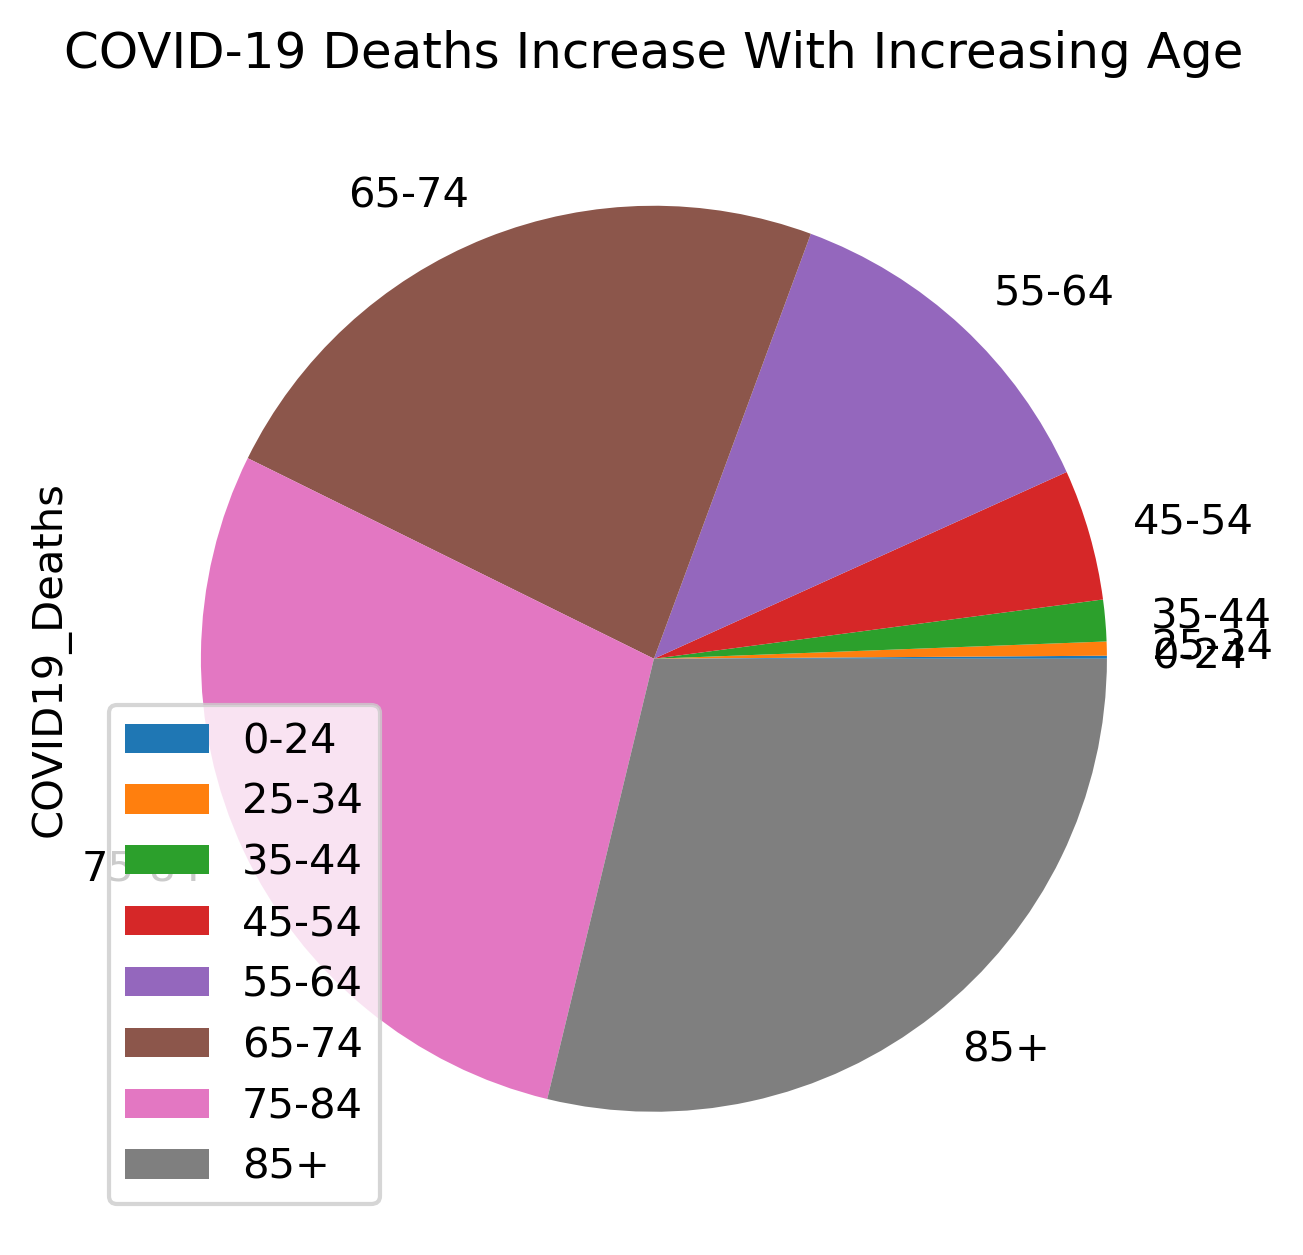

In [35]:
new = age_group_deaths.set_index('Age_Group')  #set index to the pieces going into the pie chart
new
new.plot.pie(y = 'COVID19_Deaths', figsize=(5, 5))
plt.title("COVID-19 Deaths Increase With Increasing Age")

Text(0.5, 1.0, 'COVID-19 Deaths Increase With Increasing Age')

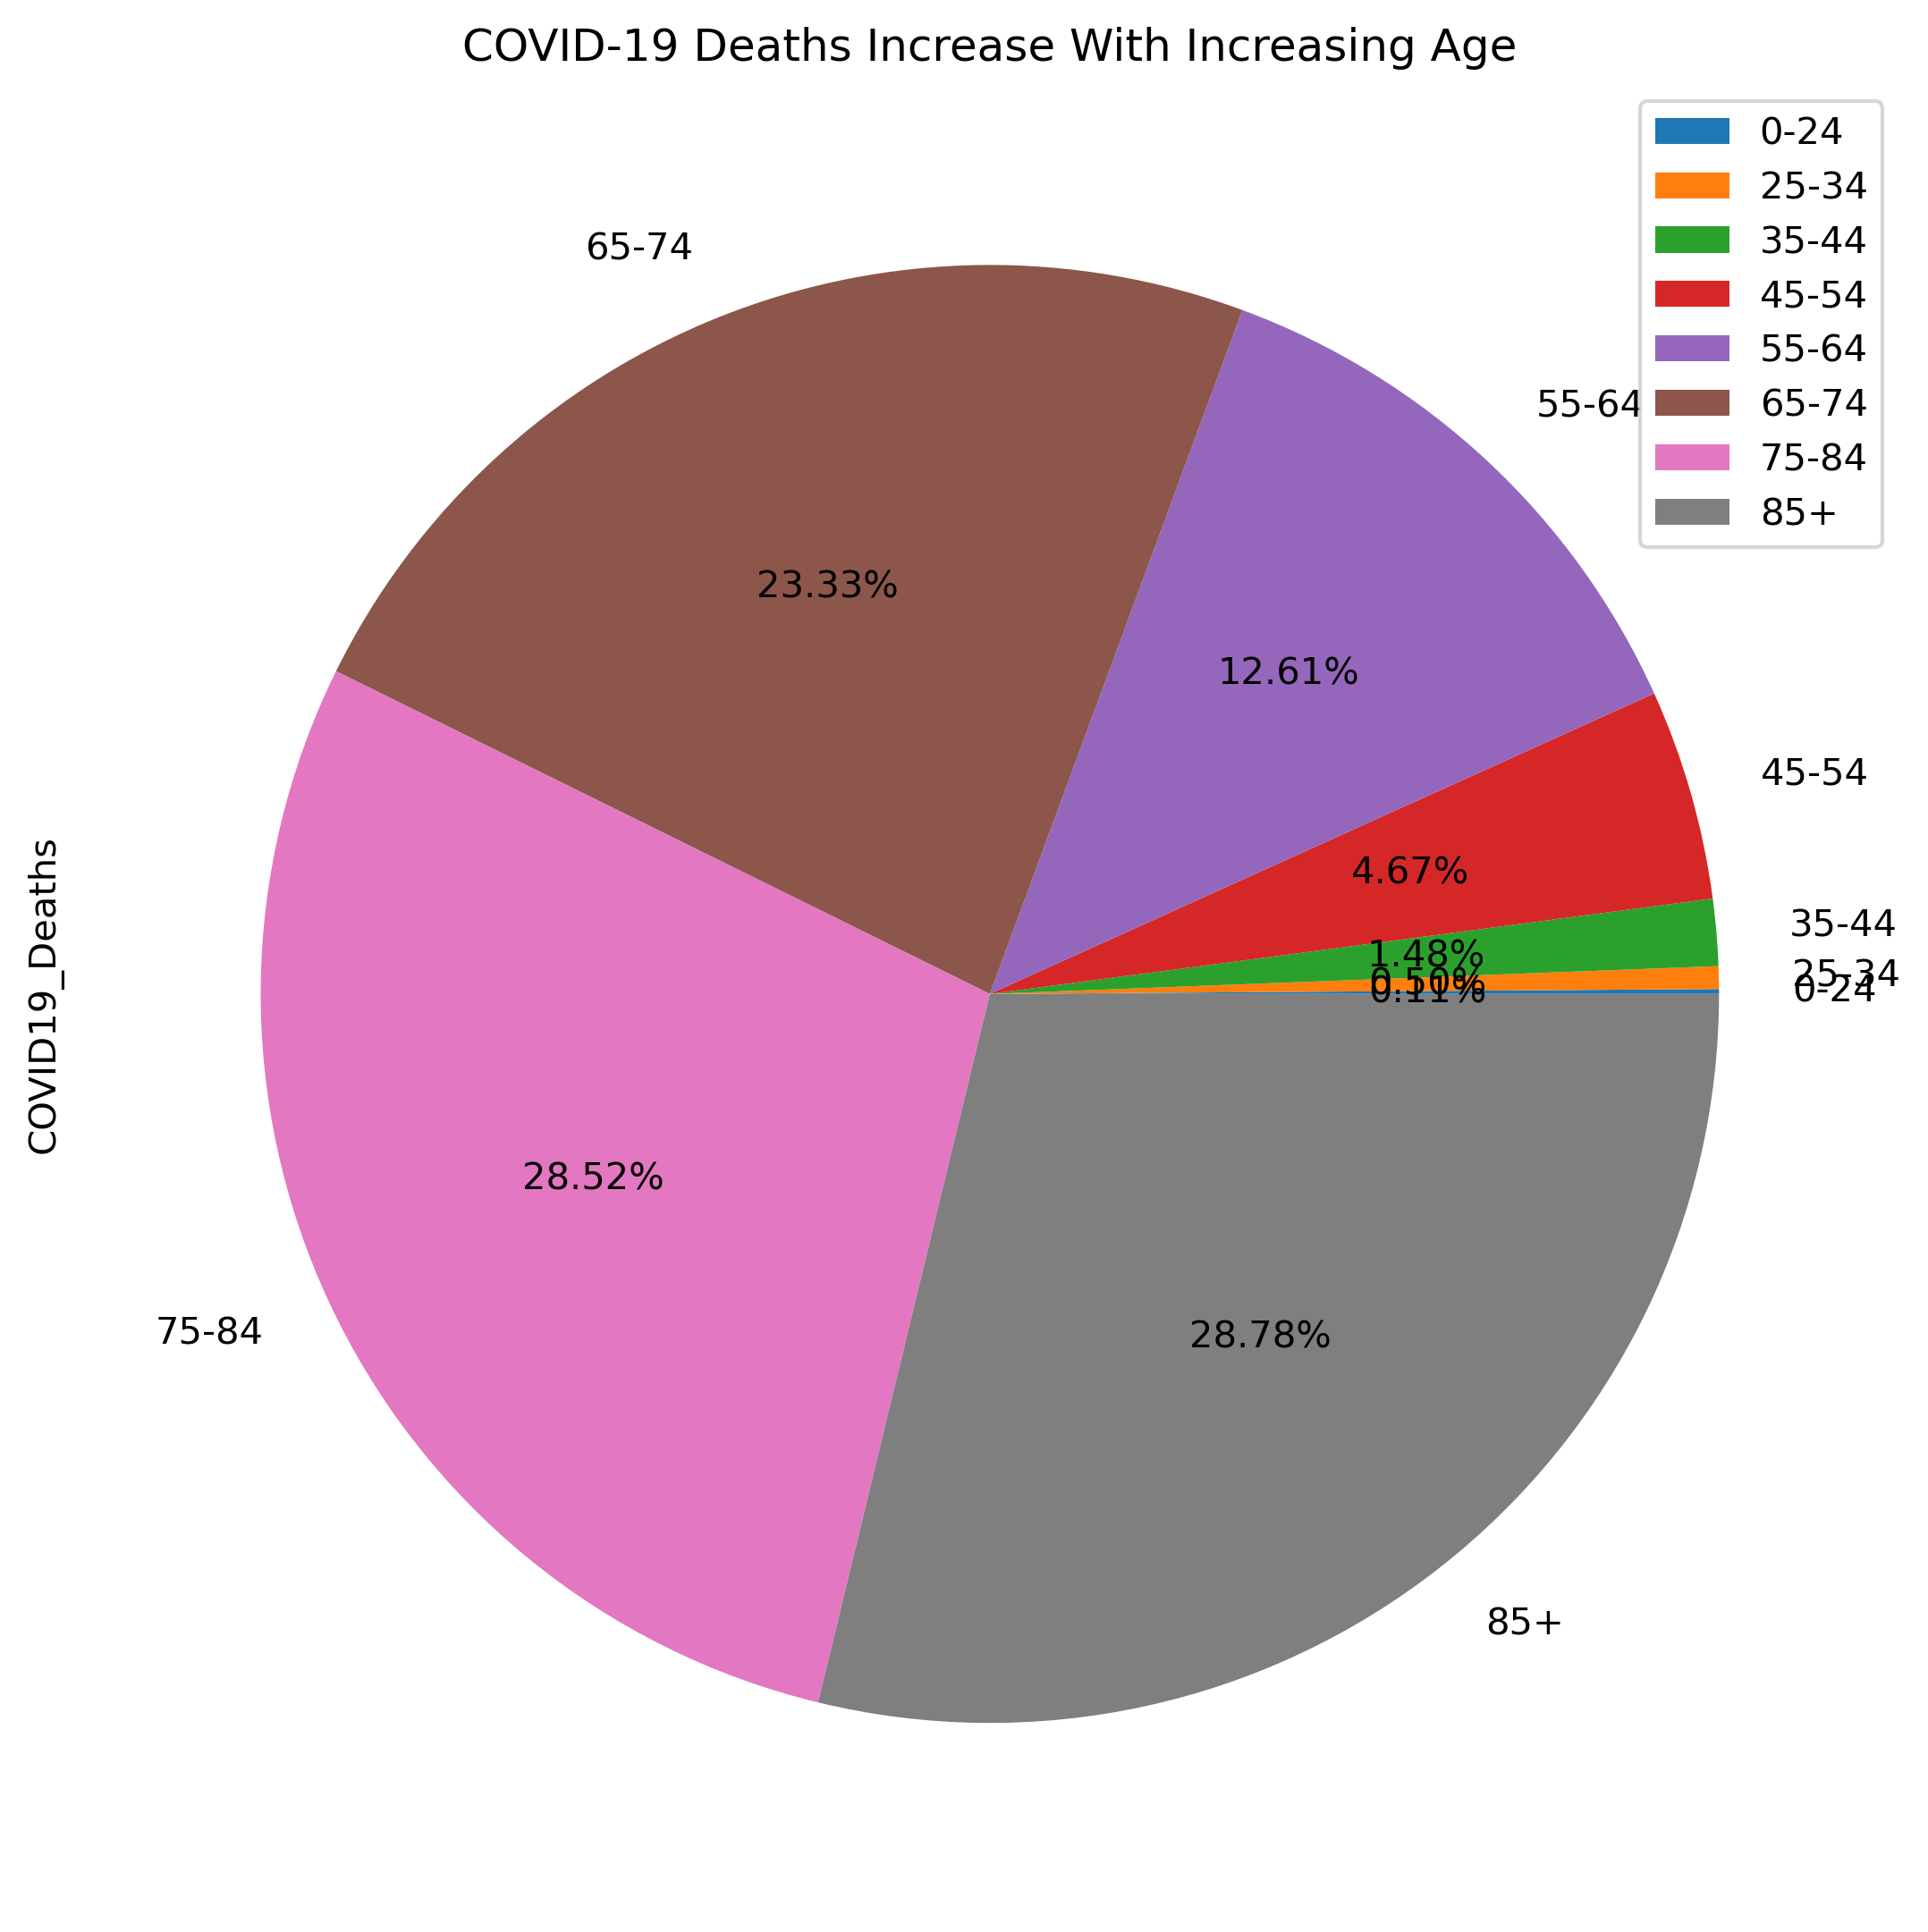

In [36]:
#Pie Chart showing percentage of COVID-19 Deaths by Age Group
age_group_deaths.plot.pie(y = 'COVID19_Deaths',labels = age_group_deaths.Age_Group, autopct="%1.2f%%" ,figsize=(9, 9))
plt.title("COVID-19 Deaths Increase With Increasing Age") 

# ax = df_pie.plot.pie(y="Total Population", labels=df_pie.continent, autopct="%1.2f%%")
# # _ = ax.set_title("Asia is the most populous continent")
# plt.title("Asia is the most populous continent")

# SQL

In [37]:
!pip install pandasql
#import pandasql as ps
from pandasql import sqldf

#lambda function that can make writing your queries easier
pysqldf = lambda q: sqldf(q, globals())

#output = sqldf("select * from df")

In [38]:
#select the whole dataframe 
q = """SELECT *
       FROM df 
       LIMIT 10;"""

sql_df = pysqldf(q)
sql_df

,Data_As_Of,Start_Date,End_Date,Group,Year,Month,State,Condition_Group,Condition,ICD10_codes,Age_Group,COVID19_Deaths,Number_of_Mentions,Flag
0,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,370.0,384.0,None
1,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1692.0,1731.0,None
2,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,4548.0,4664.0,None
3,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,13587.0,13964.0,None
4,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,34936.0,35852.0,None
5,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,65-74,61359.0,62804.0,None
6,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,75-84,71854.0,73129.0,None
7,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,85+,66033.0,66717.0,None
8,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,0-24,48.0,50.0,None
9,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,25-34,154.0,154.0,None


# Number of COVID19 Deaths by Age Group(Pandas then SQL)

In [39]:
#number of deaths by age-group
q = """SELECT Age_Group, SUM (COVID19_Deaths)
       FROM df
       GROUP BY Age_Group;"""

sql_df = pysqldf(q)
sql_df

,Age_Group,SUM (COVID19_Deaths)
0,0-24,9695.0
1,25-34,45281.0
2,35-44,133936.0
3,45-54,422475.0
4,55-64,1139929.0
5,65-74,2109344.0
6,75-84,2578187.0
7,85+,2602431.0


In [40]:
df.groupby('Age_Group')['COVID19_Deaths'].sum()

Age_Group
0-24        9695.0
25-34      45281.0
35-44     133936.0
45-54     422475.0
55-64    1139929.0
65-74    2109344.0
75-84    2578187.0
85+      2602431.0
Name: COVID19_Deaths, dtype: float64

In [41]:
import sqlite3 as db
# Import df dataframe above to sqlite database
# Connect to a database (or create one if it doesn't exist)
conn = db.connect('data.db')
df.to_sql('df', conn, if_exists='replace', index=False)
pd.read_sql_query('SELECT * FROM df LIMIT 5', conn)

,Data_As_Of,Start_Date,End_Date,Group,Year,Month,State,Condition_Group,Condition,ICD10_codes,Age_Group,COVID19_Deaths,Number_of_Mentions,Flag
0,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,370.0,384.0,None
1,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1692.0,1731.0,None
2,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,4548.0,4664.0,None
3,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,13587.0,13964.0,None
4,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,34936.0,35852.0,None


In [42]:
#Keep only relevant columns
query = '''SELECT Start_Date, End_Date,State, Condition_Group, Condition,Age_Group, COVID19_Deaths
            FROM df
          
'''

ans = pd.read_sql_query(query, conn)
ans

,Start_Date,End_Date,State,Condition_Group,Condition,Age_Group,COVID19_Deaths
0,01/01/2020,04/24/2021,United States,Respiratory diseases,Influenza and pneumonia,0-24,370.0
1,01/01/2020,04/24/2021,United States,Respiratory diseases,Influenza and pneumonia,25-34,1692.0
2,01/01/2020,04/24/2021,United States,Respiratory diseases,Influenza and pneumonia,35-44,4548.0
3,01/01/2020,04/24/2021,United States,Respiratory diseases,Influenza and pneumonia,45-54,13587.0
4,01/01/2020,04/24/2021,United States,Respiratory diseases,Influenza and pneumonia,55-64,34936.0
...,...,...,...,...,...,...,...
180571,12/01/2020,12/31/2020,Puerto Rico,All other conditions and causes (residual),All other conditions and causes (residual),85+,37.0
180572,01/01/2021,01/31/2021,Puerto Rico,All other conditions and causes (residual),All other conditions and causes (residual),85+,22.0
180573,02/01/2021,02/28/2021,Puerto Rico,All other conditions and causes (residual),All other conditions and causes (residual),85+,NaN
180574,03/01/2021,03/31/2021,Puerto Rico,All other conditions and causes (residual),All other conditions and causes (residual),85+,NaN


# All rows in the dataframe with no null values in the COVID19_Deaths Column-Show only 5 rows

In [43]:
query = '''SELECT *
            FROM df
            WHERE COVID19_Deaths IS NOT NULL
            LIMIT 5'''
ans = pd.read_sql_query(query, conn)
ans

,Data_As_Of,Start_Date,End_Date,Group,Year,Month,State,Condition_Group,Condition,ICD10_codes,Age_Group,COVID19_Deaths,Number_of_Mentions,Flag
0,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,370.0,384.0,None
1,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1692.0,1731.0,None
2,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,4548.0,4664.0,None
3,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,13587.0,13964.0,None
4,04/25/2021,01/01/2020,04/24/2021,By Total,None,None,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,34936.0,35852.0,None


In [44]:
# 
# SELECT column_name(s)
# FROM table_name
# WHERE condition
# GROUP BY column_name(s)
# ORDER BY column_name(s);

# Total number of COVID19 Deaths in Each State as of 4/25/2021 in Descending Order

In [45]:
query = '''SELECT State, SUM(COVID19_Deaths)
            FROM df
            WHERE COVID19_Deaths IS NOT NULL AND State IS NOT 'United States'
            GROUP BY State
            ORDER BY SUM(COVID19_Deaths) DESC
            
'''

ans = pd.read_sql_query(query, conn)
ans

,State,SUM(COVID19_Deaths)
0,California,594686.0
1,Texas,449591.0
2,Florida,281475.0
3,Pennsylvania,204676.0
4,New Jersey,189619.0
5,New York,180697.0
6,New York City,172959.0
7,Illinois,165818.0
8,Ohio,161560.0
9,Georgia,132533.0


# Total number of COVID19 Deaths in Each State as of 4/25/2021 By Condition_Group

In [46]:
query = '''SELECT State, Condition_Group, SUM(COVID19_Deaths) as Deaths
            FROM df
            WHERE COVID19_Deaths IS NOT NULL AND State IS NOT 'United States'
            GROUP BY State, Condition_Group
            ORDER BY Deaths DESC
            
'''

ans = pd.read_sql_query(query, conn)
ans

,State,Condition_Group,Deaths
0,California,Respiratory diseases,240679.0
1,Texas,Respiratory diseases,174865.0
2,California,Circulatory diseases,158811.0
3,Florida,Respiratory diseases,106235.0
4,Texas,Circulatory diseases,102844.0
...,...,...,...
578,Vermont,Malignant neoplasms,0.0
579,Vermont,Obesity,0.0
580,Vermont,Renal failure,0.0
581,Vermont,Sepsis,0.0


# Find unique values for the end date

In [47]:
query = '''SELECT DISTINCT End_Date
            FROM df
            
          
'''

ans = pd.read_sql_query(query, conn)
ans

,End_Date
0,04/24/2021
1,12/31/2020
2,01/31/2020
3,02/29/2020
4,03/31/2020
5,04/30/2020
6,05/31/2020
7,06/30/2020
8,07/31/2020
9,08/28/2020


# Total number of COVID19 Deaths in Each State in 2020 and in Descending Order¶

In [48]:
query = '''SELECT State, SUM(COVID19_Deaths) as Deaths
            FROM df
            WHERE COVID19_Deaths IS NOT NULL AND State IS NOT 'United States' AND End_Date BETWEEN '01/01/2020' and '12/31/2020'

            GROUP BY State
            ORDER BY Deaths DESC
         
'''

ans = pd.read_sql_query(query, conn)
ans

,State,Deaths
0,California,594686.0
1,Texas,449591.0
2,Florida,281475.0
3,Pennsylvania,204676.0
4,New Jersey,189619.0
5,New York,180697.0
6,New York City,172959.0
7,Illinois,165818.0
8,Ohio,161560.0
9,Georgia,132533.0
